<a href="https://colab.research.google.com/github/albreyes/python/blob/main/neuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Las redes neuronales son unos algoritmos muy potentes en el mundo del Machine Learning.

Por tanto, para poder montar una capa de una red neuronal solo necesitamos saber el número de neuronas en la capa y el número de neuronas de la capa anterior. Con eso, podremos crear tanto W como b.

Para crear esta estructura vamos a crear una clase, que llamaremos capa. Además, vamos a inicializar los parámetros (b y W) con datos aleatorios. Para esto último usaremos la función trunconorm de la librería stats, ya que nos permite crear datos aleatorios dado un rango, media y desviación estándar, lo cual hará que a nuestra red le cueste menos arrancar.

In [ ]:
from scipy import stats
import numpy as np

class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

La función sigmoide básicamente recibe un valor x y devuelve un valor entre 0 y 1. Esto hace que sea una función muy interesante, ya que indica la probabilidad de un estado. Por ejemplo, si usamos la función sigmoide en la última capa para un problema de clasificación entre dos clases, la función devolverá la probabilidad de pertenencia a un grupo.

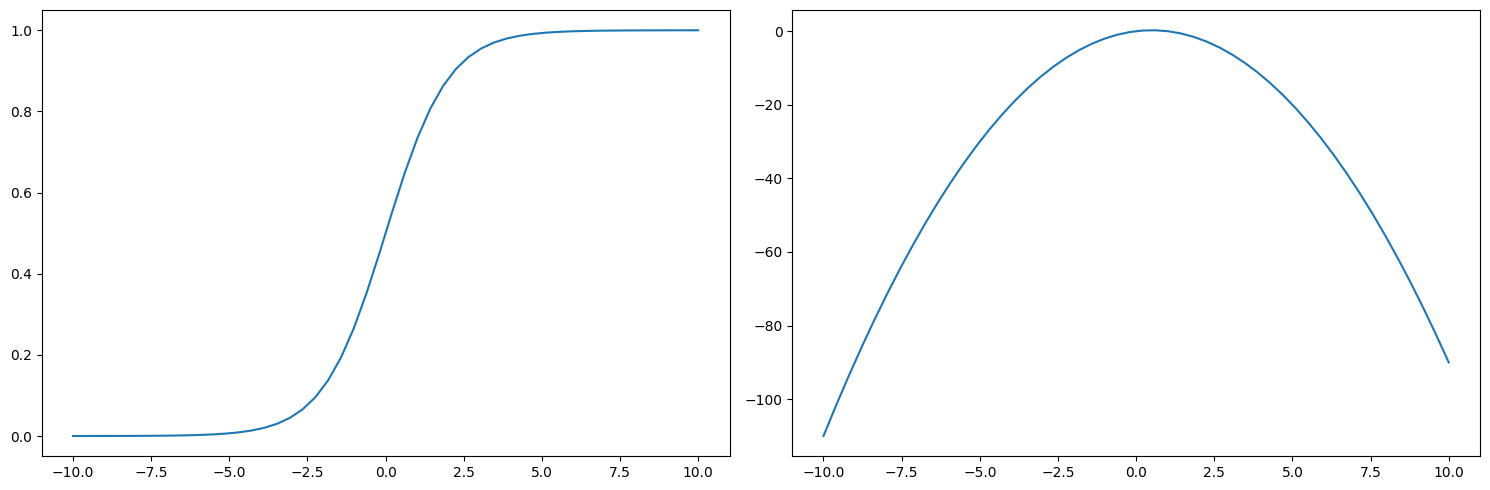

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


sigmoid = (
  lambda x:1 / (1 + np.exp(-x)),
  lambda x:x * (1 - x)
  )

rango = np.linspace(-10,10).reshape([50,1])
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

#Cremos los graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()

La función ReLu es muy simple: para valores negativos, la función devuelve cero. Para valores positivos, la función devuelve el mismo valor. Pero, a pesar de ser tan simple, esta función es la función de activación más usada en el campo de las redes neuronales y deep learning. ¿El motivo? Pues precisamente porque es sencilla y porque evita el gradient vanish (más info aquí).

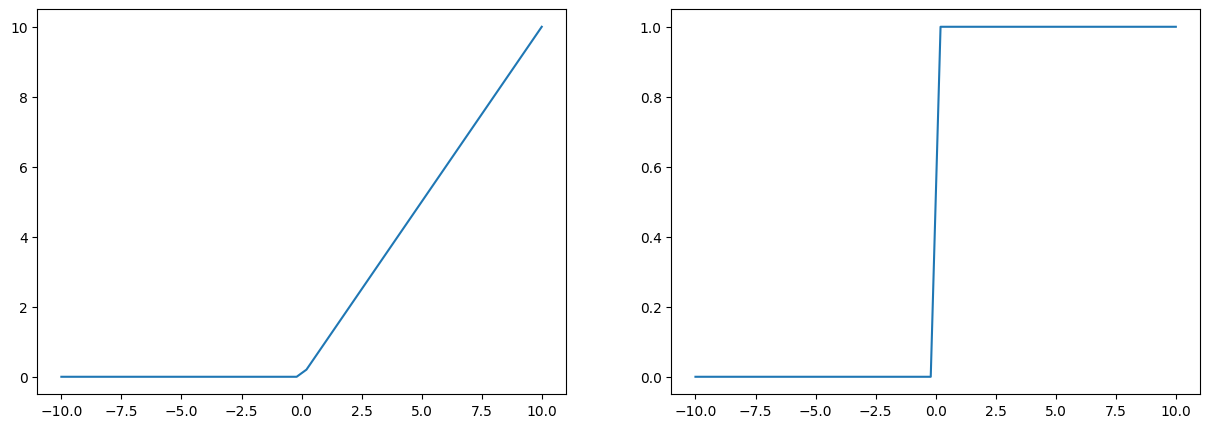

In [ ]:
def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)


# Volvemos a definir rango que ha sido cambiado
rango = np.linspace(-10,10).reshape([50,1])

# Cremos los graficos
#plt.cla()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_relu[:,0])
axes[1].plot(rango, datos_relu_derivada[:,0])
plt.show()

Con todo esto, ya podemos crear la estructura de nuestra red neuronal programada en Python. Lo haremos de forma iterativa e iremos guardando esta estructura en un nuevo objeto, llamado red_neuronal.

In [ ]:
# Numero de neuronas en cada capa.
# El primer valor es el numero de columnas de la capa de entrada.
neuronas = [2,4,8,1]

# Funciones de activacion usadas en cada capa.
funciones_activacion = [relu,relu, sigmoid]

In [ ]:
red_neuronal = []

for paso in range(len(neuronas)-1):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)

print(red_neuronal)

[<__main__.capa object at 0x78c3f4e06380>, <__main__.capa object at 0x78c40d82be80>, <__main__.capa object at 0x78c40d82bd00>]


Con esto ya tenemos la estructura de nuestra red neuronal. Ahora solo quedarían dos pasos más: por un lado, conectar la red para que nos de una predicción y un error y, por el otro lado, ir propagando ese error hacia atrás para ir entrenando a nuestra red neuronal.

Para multiplicar los valores de entrada por la matriz de pesos tenemos que hacer una multiplicación matricial. Veamos el ejemplo de la primera capa:

In [ ]:
X =  np.round(np.random.randn(20,2),3) # Ejemplo de vector de entrada

z = X @ red_neuronal[0].W

print(z[:10,:], X.shape, z.shape)

[[-0.444442 -0.102086 -0.114053 -0.677256]
 [ 0.791322  0.35091   0.334845 -1.563849]
 [-1.365968 -0.417112 -0.431056 -0.389109]
 [ 0.721504  0.251264  0.251792 -0.301188]
 [ 0.660138  0.217782  0.220941 -0.077256]
 [ 0.89935   0.369146  0.357443 -1.29153 ]
 [ 0.697274  0.252454  0.250837 -0.448728]
 [-0.51139  -0.187946 -0.186143  0.374835]
 [-1.511244 -0.487548 -0.497214 -0.003537]
 [ 0.032772 -0.06954  -0.05163   1.311876]] (20, 2) (20, 4)


Ahora, hay que sumar el parámetro bias (b) al resultado anterior de z.

In [ ]:
z = z + red_neuronal[0].b

print(z[:5,:])

[[-0.327442  0.177914  0.552947 -1.541256]
 [ 0.908322  0.63091   1.001845 -2.427849]
 [-1.248968 -0.137112  0.235944 -1.253109]
 [ 0.838504  0.531264  0.918792 -1.165188]
 [ 0.777138  0.497782  0.887941 -0.941256]]


Ahora, habría que aplicar la función de activación de esa capa

In [ ]:
a = red_neuronal[0].funcion_act[0](z)
a[:5,:]

array([[-0.      ,  0.177914,  0.552947, -0.      ],
       [ 0.908322,  0.63091 ,  1.001845, -0.      ],
       [-0.      , -0.      ,  0.235944, -0.      ],
       [ 0.838504,  0.531264,  0.918792, -0.      ],
       [ 0.777138,  0.497782,  0.887941, -0.      ]])

Con esto, tendríamos el resultado de la primera capa, que a su vez es la entrada para la segunda capa y así hasta la última. Por tanto, queda bastante claro que todo esto lo podemos definir de forma iterativa dentro de un bucle.

In [ ]:
output = [X]

for num_capa in range(len(red_neuronal)):
  z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b
  a = red_neuronal[num_capa].funcion_act[0](z)
  output.append(a)

print(output[-1])

[[0.76099978]
 [0.527375  ]
 [0.7821748 ]
 [0.55965085]
 [0.58136503]
 [0.49894998]
 [0.56696635]
 [0.76546006]
 [0.78658166]
 [0.73468638]
 [0.63499712]
 [0.766086  ]
 [0.79423653]
 [0.75732182]
 [0.57940833]
 [0.79354151]
 [0.77411433]
 [0.77142533]
 [0.7790836 ]
 [0.68775292]]


Así, tendríamos la estimación para cada una de las clases de este ejercicio de prueba. Como es la primera ronda, la red no ha entrenado nada, por lo que el resultado es aleatorio. Por tanto, solo quedaría una cosa: entrenar a nuestra red neuronal programada en Python. ¡vamos a ello!

Para poder entrenar la red neuronal lo primero que debemos hacer es calcular cuánto ha fallado. Para ello usaremos uno de los estimadores más típicos en el mundo del machine learning: el error cuadrático medio (MSE).

Calcular el error cuadrático medio es algo bastante simple: a cada valor predicho le restas el valor real, lo elevas al cuadrado, haces la suma ponderada y calculas su raíz. Además, como hemos hecho anteriormente aprovecharemos para que esta misma función nos devuelva la derivada dela función de coste, la cual nos será útil en el paso de backpropagation.

In [ ]:
def mse(Ypredich, Yreal):

  # Calculamos el error
  x = (np.array(Ypredich) - np.array(Yreal)) ** 2
  x = np.mean(x)

  # Calculamos la derivada de la funcion
  y = np.array(Ypredich) - np.array(Yreal)
  return (x,y)

Con esto, vamos a «inventarnos» unas clases (0 o 1) para los valores que nuestra red neuronal ha predicho antes. Así, calcularemos el error cuadrático medio.

In [ ]:
from random import shuffle

Y = [0] * 10 + [1] * 10
shuffle(Y)
Y = np.array(Y).reshape(len(Y),1)

mse(output[-1], Y)[0]

0.2969446550880105

Ahora que ya tenemos el error calculado, tenemos que irlo propagando hacia atrás para ir ajustando los parámetros. Haciendo esto de forma iterativa, nuestra red neuronal irá mejorando sus predicciones, es decir, disminuirá su error. Vamos, que así es como se entrena a una red neuronal.

Dicho esto, veamos cómo funcionan gradient descent y backpropagation. Para ello,vamos a ver qué valores tienen inicialmente nuestros parámetros W y b en una capa cualquiera, como por ejemplo la última.

In [ ]:
red_neuronal[-1].b
red_neuronal[-1].W

array([[-0.531],
       [-0.274],
       [ 0.168],
       [-0.909],
       [ 0.895],
       [ 0.692],
       [ 0.155],
       [ 0.678]])

Como desconocemos el valor óptimo de estos parámetros, los hemos inicializado de forma aleatoria. Por tanto, en cada ronda estos valores se irán cambiando pooco a poco. Para ello, lo primero que debemos hacer es transmitir el error hacia atrás. Como estamos trabajando de atrás hacia adelante (o de derecha a izquierda si visualizamos la red), partiremos de la última capa e iremos hacia adelante.

El error lo calculamos como la derivada de la función de coste sobre el resultado de la capa siguiente por la derivada de la función de activación. En nuestro caso, el resultado del último valor está en la capa -1, mientras que la capa que vamos a optimizar es la anteúltima (posición -2). Además, como hemos definido las funciones como un par de funciones, simplemente tendremos que indicar el resultado de la función en la posición [1] en ambos casos.

In [ ]:
# Backprop en la ultima capa
a = output[-1]
x = mse(a,Y)[1] * red_neuronal[-2].funcion_act[1](a)

x

array([[ 0.76099978],
       [ 0.527375  ],
       [ 0.7821748 ],
       [ 0.55965085],
       [ 0.58136503],
       [-0.50105002],
       [-0.43303365],
       [ 0.76546006],
       [-0.21341834],
       [-0.26531362],
       [ 0.63499712],
       [-0.233914  ],
       [-0.20576347],
       [ 0.75732182],
       [-0.42059167],
       [ 0.79354151],
       [ 0.77411433],
       [-0.22857467],
       [-0.2209164 ],
       [-0.31224708]])

Si hiciéramos esto en cada capa, iríamos propagando el error generado por la estimación de la red neuronal. Sin embargo, propagar el error por si mismo no hace nada, sino que ahora tenemos que usar ese error para optimizar los valores de los parámetros mediante gradient descent. Para ello, tenemos calcular las derivadas en el punto de los parámetros b y W y restar esos valores a los valores anteriores de b y W.

In [ ]:
red_neuronal[-1].b = red_neuronal[-1].b - x.mean() * 0.01
red_neuronal[-1].W = red_neuronal[-1].W - (output[-1].T @ x) * 0.01

red_neuronal[-1].b
red_neuronal[-1].W

array([[-0.57002177],
       [-0.31302177],
       [ 0.12897823],
       [-0.94802177],
       [ 0.85597823],
       [ 0.65297823],
       [ 0.11597823],
       [ 0.63897823]])

Con esto ya habríamos actualizado los parámetros de W y b en la última capa. Ahora bien, para calcular el error de la siguiente capa tendríamos que multiplicar matricialmente el error de esta capa (x) por los pesos de la misma, para así saber cuánto de ese error corresponde a cada neurona de la capa. Pero claro, ya hemos actualizado los pesos, por lo que eso fastidiaría el aprendizaje, ¿no?



Efectivamente, eso nos generaría un problema y tendríamos que esperar una iteración más para aplicar cambios. Sin embargo, tiene solución y muy fácil. Para evitar ese problema lo que hacemos es guardar los valores de W antes de actualizar en una variable «temporal», que en mi caso he llamado W_temp. De esta manera, somos capaces de calcular el error correspondiente a cada neurona y actualizar los valores de los parámetros todo en una misma iteración.

Si ponemos todo esto junto, la fórmula de backpropagation y gradient descent queda de la siguiente manera:

In [ ]:
# Definimos el learning rate
lr = 0.05

# Creamos el indice inverso para ir de derecha a izquierda
back = list(range(len(output)-1))
back.reverse()

# Creamos el vector delta donde meteremos los errores en cada capa
delta = []

for capa in back:
  # Backprop #

  # Guardamos los resultados de la ultima capa antes de usar backprop para poder usarlas en gradient descent
  a = output[capa+1][1]

  # Backprop en la ultima capa
  if capa == back[0]:
    x = mse(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Backprop en el resto de capas
  else:
    x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Guardamos los valores de W para poder usarlos en la iteracion siguiente
  W_temp = red_neuronal[capa].W.transpose()

  # Gradient Descent #

  # Ajustamos los valores de los parametros de la capa
  red_neuronal[capa].b = red_neuronal[capa].b - delta[-1].mean() * lr
  red_neuronal[capa].W = red_neuronal[capa].W - (output[capa].T @ delta[-1]) * lr


print('MSE: ' + str(mse(output[-1],Y)[0]) )
print('Estimacion: ' + str(output[-1]) )

MSE: 0.5
Estimacion: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


Con esto ya tendríamos aplicado backpropagation y gradient descent. Así que, ¿qué te parece ver cómo funciona nuestra red neuronal programada en Python con un caso práctico? ¡Vamos a ello!

## Caso práctico: poniendo a prueba a nuestra red neuronal

#### Definición del problema: clasificación de puntos

Vamos a poner a prueba a nuestra red con un problema bastante sencillo: clasificar puntos de dos nubes de puntos. Para ello, lo primero que vamos a hacer es crear una función que nos devuelva puntos aleatorios al rededor de un círculo imaginario de radio R.

In [ ]:
import random

def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1):
  pi = math.pi
  r = R * np.sqrt(stats.truncnorm.rvs(minimo, maximo, size= num_datos)) * 10
  theta = stats.truncnorm.rvs(minimo, maximo, size= num_datos) * 2 * pi *10

  x = np.cos(theta) * r
  y = np.sin(theta) * r

  y = y.reshape((num_datos,1))
  x = x.reshape((num_datos,1))

  #Vamos a reducir el numero de elementos para que no cause un Overflow
  x = np.round(x,3)
  y = np.round(y,3)

  df = np.column_stack([x,y])
  return(df)

Ahora, crearemos dos sets de datos aleatorios, cada uno de 150 puntos y con radios diferentes. La idea de hacer que los datos se creen de forma aleatoria es que puedan solaparse, de tal manera que a la red neuronal le cueste un poco y el resultado no sea perfecto.

In [ ]:
datos_1 = circulo(num_datos = 150, R = 2)
datos_2 = circulo(num_datos = 150, R = 0.5)
X = np.concatenate([datos_1,datos_2])
X = np.round(X,3)

Y = [0] * 150 + [1] * 150
Y = np.array(Y).reshape(len(Y),1)

Con esto ya tendríamos nuestros datos de entrada (X) y sus correspondientes etiquetas (Y). Teniendo esto en cuenta, visualicemos cómo es el problema que debe resolver nuestra red neuronal

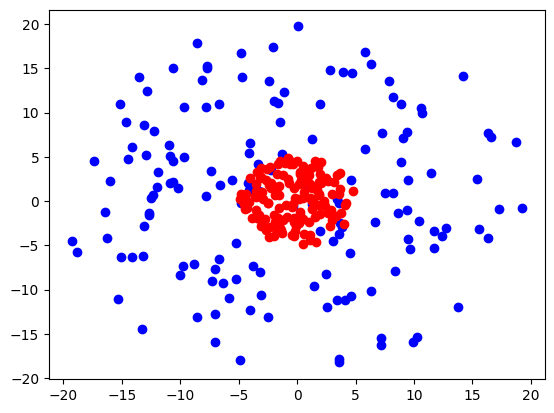

In [ ]:
plt.cla()
plt.scatter(X[0:150,0],X[0:150,1], c = "b")
plt.scatter(X[150:300,0],X[150:300,1], c = "r")
plt.show()

##Entrenamiento de nuestra red neuronal

Lo primero de todo, vamos a crear funciones a partir del código que hemos generado anteriormente. Esto nos facilitirará las cosas

In [ ]:
def entrenamiento(X,Y, red_neuronal, lr = 0.01):

  # Output guardara el resultado de cada capa
  # En la capa 1, el resultado es el valor de entrada
  output = [X]

  for num_capa in range(len(red_neuronal)):
    z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b

    a = red_neuronal[num_capa].funcion_act[0](z)

    # Incluimos el resultado de la capa a output
    output.append(a)

  # Backpropagation

  back = list(range(len(output)-1))
  back.reverse()

  # Guardaremos el error de la capa en delta
  delta = []

  for capa in back:
    # Backprop #delta

    a = output[capa+1]

    if capa == back[0]:
      x = mse(a,Y)[1] * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    else:
      x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    W_temp = red_neuronal[capa].W.transpose()

    # Gradient Descent #
    red_neuronal[capa].b = red_neuronal[capa].b - np.mean(delta[-1], axis = 0, keepdims = True) * lr
    red_neuronal[capa].W = red_neuronal[capa].W - output[capa].transpose() @ delta[-1] * lr

  return output[-1]

¡Ya tenemos nuestra función de red neuronal funcionando! Ahora, simplemente tenemos que indicar los los parámetros y el número de rondas y esperar para ver cómo va aprendiendo nuestra red neuronal y cómo de bien se le da con el problema que hemos planteado. ¡Vamos a ello!

Para ello, volvemos a crear la clase neurona y definir nuestra red neuronal, para así reinicializar todo y no depender del código escrito anteriormente.

In [ ]:
class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

neuronas = [2,4,8,1]
funciones_activacion = [relu,relu, sigmoid]
red_neuronal = []

for paso in list(range(len(neuronas)-1)):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)

Ahora que ya tenemos la red entrenada, vamos a usar la función de entrenamiento. Además, vamos a ir guardando tanto las predicciones que hace como el error que está cometiendo. De esta manera podremos visualizar cómo ha entrenado nuestra red.

In [ ]:
error = []
predicciones = []

for epoch in range(0,1000):
  ronda = entrenamiento(X = X ,Y = Y ,red_neuronal = red_neuronal, lr = 0.001)
  predicciones.append(ronda)
  temp = mse(np.round(predicciones[-1]),Y)[0]
  error.append(temp)



Ningún error, así que parece que todo ha ido bien. Vamos a ver cómo ha mejorado el error de la red en cada iteración

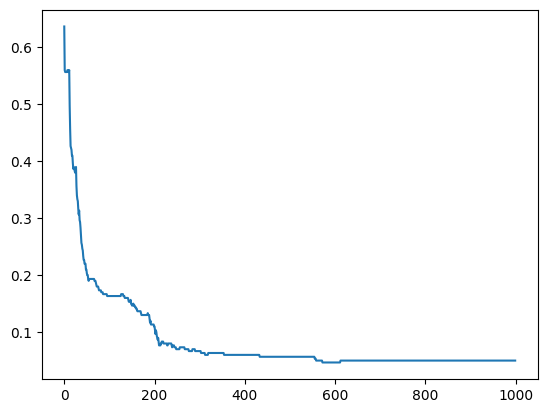

In [ ]:
epoch = list(range(0,1000))
plt.plot(epoch, error)

¡Nuestra red neuronal ha entrenado! De hecho, nuestra red neuronal programada en Python a partido de un error del 0.5, es decir, un respuesta completamente aleatoria, a un error de tan solo 0.12 en el último epoch.

De hecho vemos que desde el epoch 900 la red neuronal no ha mejorado su resultado. Esto se debe a que sus parámetros ya están optimizados, por lo que no puede aprender más.